### Image Stiching

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

#for single image
def imshow(title,image,size=5):
    w,h = image.shape[1],image.shape[0]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.title(title)
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.show()

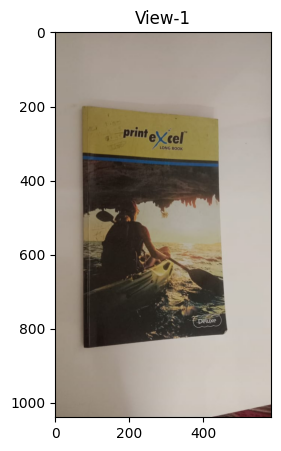

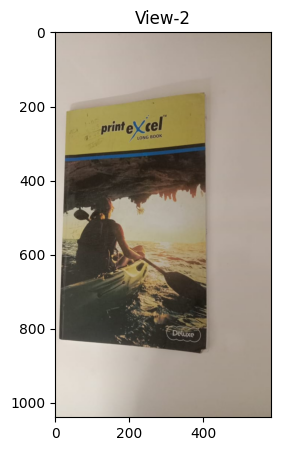

In [2]:
img1 = cv.imread(os.path.join('..','data','bookview1.jpeg'))
img2 = cv.imread(os.path.join('..','data','bookview2.jpeg'))
imshow('View-1',img1)
imshow('View-2',img2)


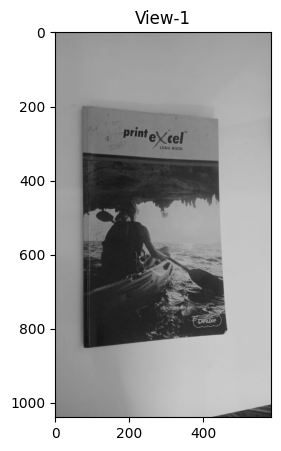

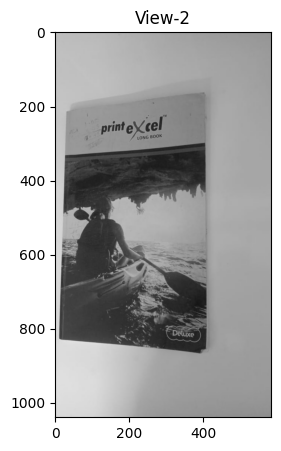

In [3]:
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
imshow('View-1',gray1)
imshow('View-2',gray2)

In [9]:
# Creating a feature detector and descriptor using orb
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(img1,None)
kp2,des2 = orb.detectAndCompute(img2,None)

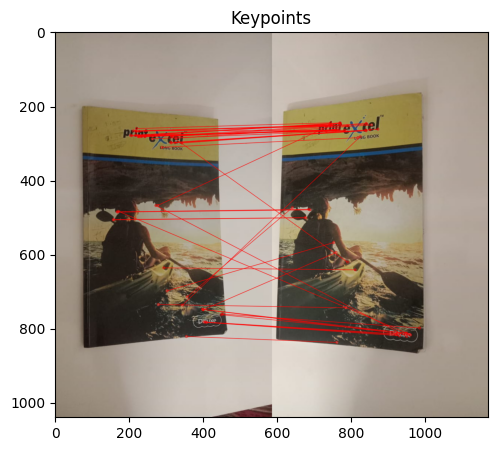

In [26]:
#matching the descriptors
bf = cv.BFMatcher(cv.NORM_HAMMING,True)
matches = bf.match(des1,des2)
sorted_matches = sorted(matches,key=lambda x:x.distance,reverse=True)
matched_image = cv.drawMatches(img1,kp1,img2,kp2,sorted_matches[:50],None,(0,0,255),flags=2)
imshow('Keypoints',matched_image)